# **Classification With Model Interpretation** 

# **Pre-processing**

## **Importing Modules**


In [1]:
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix,r2_score
import warnings
from mlxtend.classifier import StackingClassifier
import missingno as msno
from sklearn.ensemble import VotingClassifier
import shap
shap.initjs()
import lime
from lime import lime_tabular
warnings.simplefilter('ignore')
import os


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


## **Reading Data**

In [2]:
insurance_df = pd.read_csv('train.csv', index_col='Id')
insurance_df.head()

Product_Info_1 Product_Info_2  Product_Info_3  Product_Info_4  \
Id                                                                  
2                1             D3              10        0.076923   
5                1             A1              26        0.076923   
6                1             E1              26        0.076923   
7                1             D4              10        0.487179   
8                1             D2              26        0.230769   

    Product_Info_5  Product_Info_6  Product_Info_7   Ins_Age        Ht  \
Id                                                                       
2                2               1               1  0.641791  0.581818   
5                2               3               1  0.059701  0.600000   
6                2               3               1  0.029851  0.745455   
7                2               3               1  0.164179  0.672727   
8                2               3               1  0.417910  0.654545   

          Wt  ...  Medical_Keyword_40  Medical_Keyword_41  Medical_Keyword_42  \
Id            ...                                                               
2   0.148536  ...                   0                   0                   0   
5   0.131799  ...                   0                   0                   0   
6   0.288703  ...                   0                   0                   0   
7   0.205021  ...                   0                   0                   0   
8   0.234310  ...                   0                   0                   0   

    Medical_Keyword_43  Medical_Keyword_44  Medical_Keyword_45  \
Id                                                               
2                    0                   0                   0   
5                    0                   0                   0   
6                    0                   0                   0   
7                    0                   0                   0   
8                    0                   0                   0   

    Medical_Keyword_46  Medical_Keyword_47  Medical_Keyword_48  Response  
Id                                                                        
2                    0                   0                   0         8  
5                    0                   0                   0         4  
6                    0                   0                   0         8  
7                    0                   0                   0         8  
8                    0                   0                   0         8  

[5 rows x 127 columns]

## **Shape**

In [3]:
insurance_df.shape

(59381, 127)

## **Distribution of Target Variable**

In [4]:
insurance_df['Response'].value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

<AxesSubplot:xlabel='Response'>

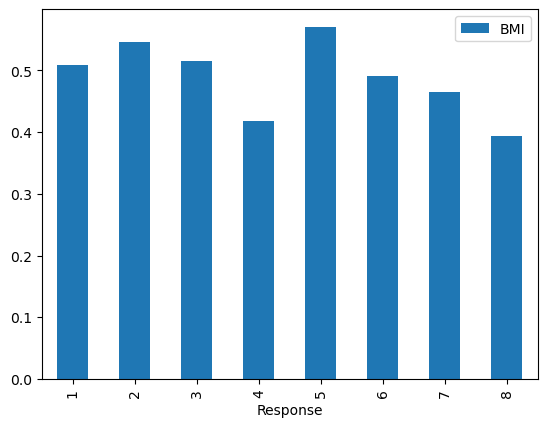

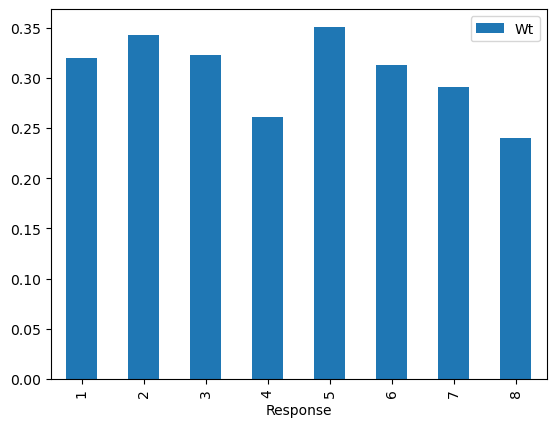

In [5]:
insurance_df[['BMI','Response']].groupby('Response').mean().plot.bar()
insurance_df[['Wt','Response']].groupby('Response').mean().plot.bar()

> **Class imbalance can be seen here. Also there 8 categories, lets combine them to 3 categories**


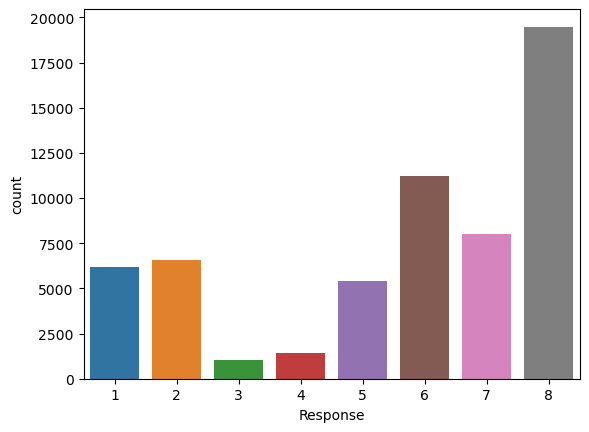

In [6]:
sns.countplot(x=insurance_df['Response']);

**Response 8 has highest values and 3 has the least**

## **Processing Target Variable**

> **Still some imbalance can be seen**

## **Removing old target variable**

## **Making categorical and numerical columns list**

In [7]:
# Making lists with categorical and numerical features.
categorical =  [col for col in insurance_df.columns if insurance_df[col].dtype =='object']

numerical = categorical =  [col for col in insurance_df.columns if insurance_df[col].dtype !='object']

## **Visualizations On Categorical Features**

# Doing count plots for categorical
for col in categorical:
    counts = insurance_df[col].value_counts().sort_index()
    if len(counts) > 10 and len(counts) < 50 :
      fig = plt.figure(figsize=(30, 10))
    elif len(counts) >50 :
      continue
    else:
      fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

> **D3 has the highest frequencies**

> Most of the features here are unbalanced.

<AxesSubplot:xlabel='Employment_Info_1'>

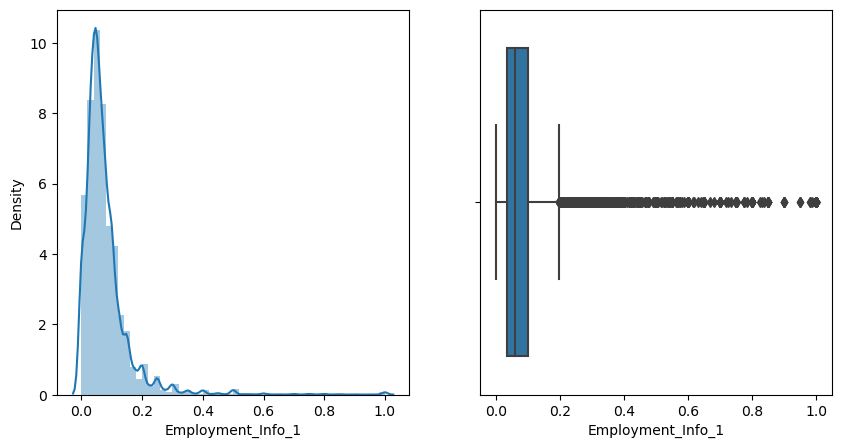

In [8]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Employment_Info_1'], ax=axes[0])
sns.boxplot(insurance_df['Employment_Info_1'], ax=axes[1])

> Right skewed.

> Outliers can be seen.

<AxesSubplot:xlabel='Employment_Info_4'>

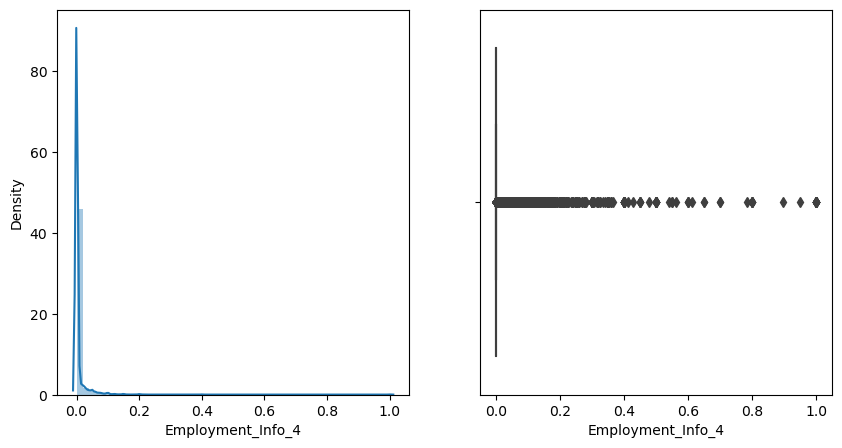

In [9]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Employment_Info_4'], ax=axes[0])
sns.boxplot(insurance_df['Employment_Info_4'], ax=axes[1])

<AxesSubplot:xlabel='Employment_Info_6'>

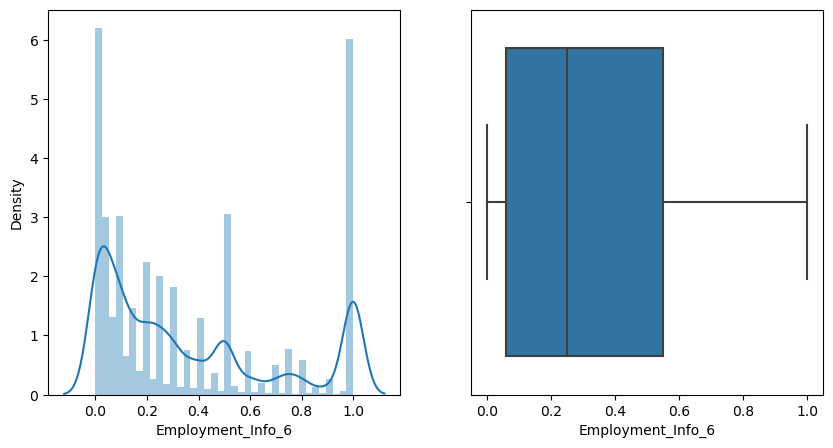

In [10]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Employment_Info_6'], ax=axes[0])
sns.boxplot(insurance_df['Employment_Info_6'], ax=axes[1])

<AxesSubplot:xlabel='Family_Hist_4'>

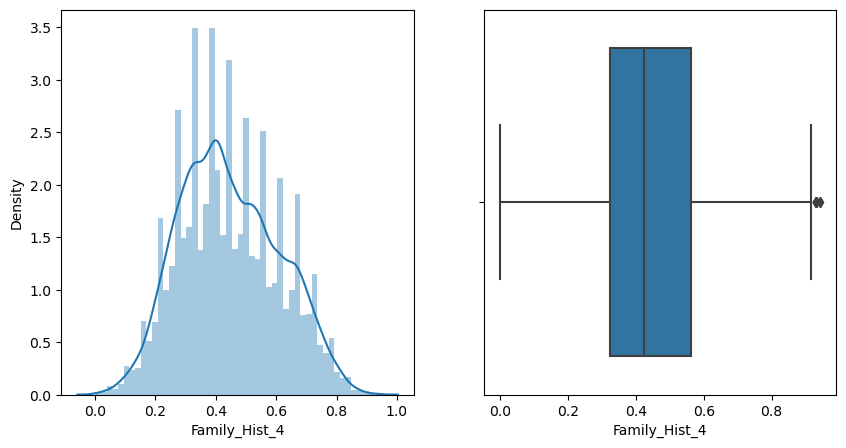

In [11]:
fig, axes = plt.subplots(1,2,figsize=(10,5))
sns.distplot(insurance_df['Family_Hist_4'], ax=axes[0])
sns.boxplot(insurance_df['Family_Hist_4'], ax=axes[1])

# **Checking Correlation For Features greater than .8**

In [12]:
# I just checked correlated feature with greater than .8 here 
corr = insurance_df.corr()
corr_greater_than_80 = corr[corr>=.8]
corr_greater_than_80


Product_Info_1  Product_Info_3  Product_Info_4  \
Product_Info_1                 1.0             NaN             NaN   
Product_Info_3                 NaN             1.0             NaN   
Product_Info_4                 NaN             NaN             1.0   
Product_Info_5                 NaN             NaN             NaN   
Product_Info_6                 NaN             NaN             NaN   
...                            ...             ...             ...   
Medical_Keyword_45             NaN             NaN             NaN   
Medical_Keyword_46             NaN             NaN             NaN   
Medical_Keyword_47             NaN             NaN             NaN   
Medical_Keyword_48             NaN             NaN             NaN   
Response                       NaN             NaN             NaN   

                    Product_Info_5  Product_Info_6  Product_Info_7  Ins_Age  \
Product_Info_1                 NaN             NaN             NaN      NaN   
Product_Info_3                 NaN             NaN             NaN      NaN   
Product_Info_4                 NaN             NaN             NaN      NaN   
Product_Info_5                 1.0             NaN             NaN      NaN   
Product_Info_6                 NaN             1.0             NaN      NaN   
...                            ...             ...             ...      ...   
Medical_Keyword_45             NaN             NaN             NaN      NaN   
Medical_Keyword_46             NaN             NaN             NaN      NaN   
Medical_Keyword_47             NaN             NaN             NaN      NaN   
Medical_Keyword_48             NaN             NaN             NaN      NaN   
Response                       NaN             NaN             NaN      NaN   

                    Ht  Wt  BMI  ...  Medical_Keyword_40  Medical_Keyword_41  \
Product_Info_1     NaN NaN  NaN  ...                 NaN                 NaN   
Product_Info_3     NaN NaN  NaN  ...                 NaN                 NaN   
Product_Info_4     NaN NaN  NaN  ...                 NaN                 NaN   
Product_Info_5     NaN NaN  NaN  ...                 NaN                 NaN   
Product_Info_6     NaN NaN  NaN  ...                 NaN                 NaN   
...                 ..  ..  ...  ...                 ...                 ...   
Medical_Keyword_45 NaN NaN  NaN  ...                 NaN                 NaN   
Medical_Keyword_46 NaN NaN  NaN  ...                 NaN                 NaN   
Medical_Keyword_47 NaN NaN  NaN  ...                 NaN                 NaN   
Medical_Keyword_48 NaN NaN  NaN  ...                 NaN                 NaN   
Response           NaN NaN  NaN  ...                 NaN                 NaN   

                    Medical_Keyword_42  Medical_Keyword_43  \
Product_Info_1                     NaN                 NaN   
Product_Info_3                     NaN                 NaN   
Product_Info_4                     NaN                 NaN   
Product_Info_5                     NaN                 NaN   
Product_Info_6                     NaN                 NaN   
...                                ...                 ...   
Medical_Keyword_45                 NaN                 NaN   
Medical_Keyword_46                 NaN                 NaN   
Medical_Keyword_47                 NaN                 NaN   
Medical_Keyword_48                 NaN                 NaN   
Response                           NaN                 NaN   

                    Medical_Keyword_44  Medical_Keyword_45  \
Product_Info_1                     NaN                 NaN   
Product_Info_3                     NaN                 NaN   
Product_Info_4                     NaN                 NaN   
Product_Info_5                     NaN                 NaN   
Product_Info_6                     NaN                 NaN   
...                                ...                 ...   
Medical_Keyword_45                 NaN                 1.0   
Medical_Keyword_46          

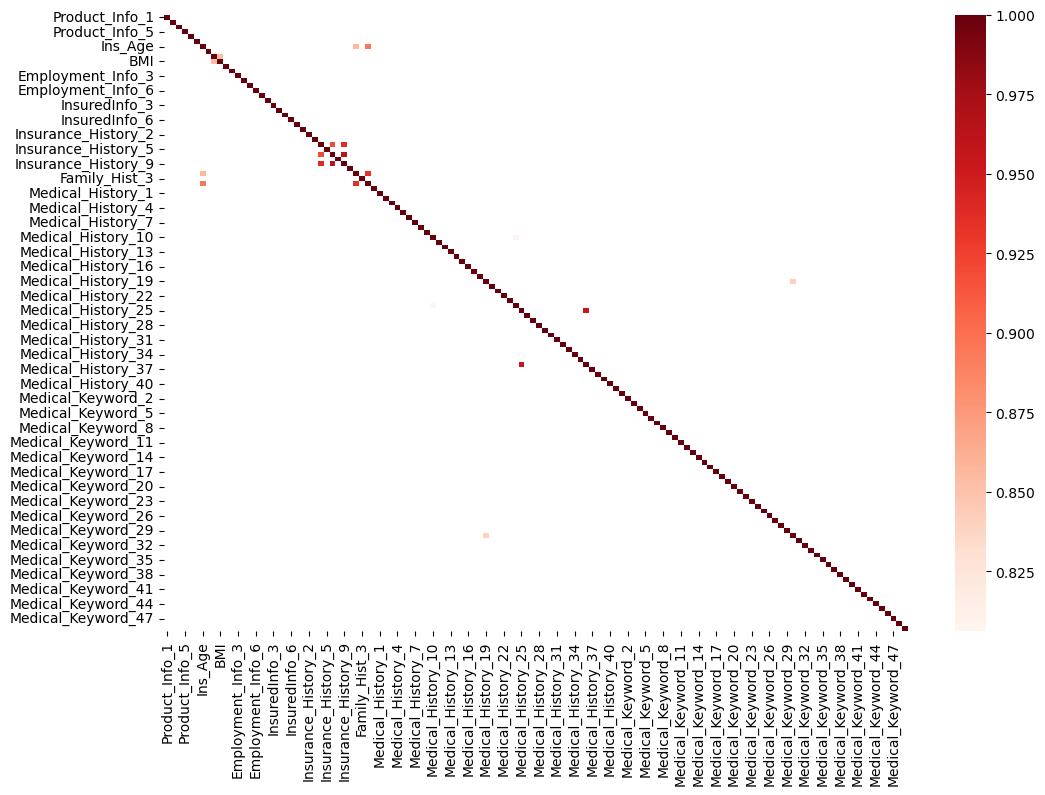

In [13]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_greater_than_80, cmap="Reds");

### **CONCLUSION**

> BMI and Weight are highly correlated, which makes sense also as these 2 features are directly proprtional.

> Ins_Age and Family_Hist_4, Family_Hist_2 highly correlated

> Although, I am not going to perform any transformation on any feature or drop any as these are tree based models and they don't get affected by correlation much because of their non parametric nature.

In [14]:
#setting max columns to 200
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

# **Null Value Check**

In [15]:
#checking percentage of missing values in a column
missing_val_count_by_column = insurance_df.isnull().sum()/len(insurance_df)

print(missing_val_count_by_column[missing_val_count_by_column > 0.4].sort_values(ascending=False))

Medical_History_10     0.990620
Medical_History_32     0.981358
Medical_History_24     0.935990
Medical_History_15     0.751015
Family_Hist_5          0.704114
Family_Hist_3          0.576632
Family_Hist_2          0.482579
Insurance_History_5    0.427679
dtype: float64


# **Removing unimportant column**

In [16]:
# Dropping all columns in which greater than 40 percent null values
insurance_df = insurance_df.dropna(thresh=insurance_df.shape[0]*0.4,how='all',axis=1)

In [17]:
# Does not contain important information
insurance_df.drop('Product_Info_2',axis=1,inplace=True)

# **X and Y split**

In [18]:
# Data for all the independent variables
X = insurance_df.drop(labels='Response',axis=1)

# Data for the dependent variable
Y = insurance_df['Response']

# **Filling Remaining Missing Values**

In [19]:
# Filling remaining missing values with mean
X = X.fillna(X.mean())

# **Train Test Split**

In [20]:
# Train-test split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.25, random_state=1)

# **Shapes of Train and Test Data**

In [21]:
# Check the shape of train dataset
print(X_train.shape,Y_train.shape)

# Check the shape of test dataset
print(X_test.shape, Y_test.shape)

(44535, 120) (44535,)
(14846, 120) (14846,)


# **Some Important functions that I will be using throughout**

In [22]:
# Utility Functions
def check_scores(model, X_train, X_test ):
  # Making predictions on train and test data

  train_class_preds = model.predict(X_train)
  test_class_preds = model.predict(X_test)


  # Get the probabilities on train and test
  train_preds = model.predict_proba(X_train)[:,1]
  test_preds = model.predict_proba(X_test)[:,1]


  # Calculating accuracy on train and test
  train_accuracy = accuracy_score(Y_train,train_class_preds)
  test_accuracy = accuracy_score(Y_test,test_class_preds)

  print("The accuracy on train dataset is", train_accuracy)
  print("The accuracy on test dataset is", test_accuracy)
  print()
  # Get the confusion matrices for train and test
  train_cm = confusion_matrix(Y_train,train_class_preds)
  test_cm = confusion_matrix(Y_test,test_class_preds )

  print('Train confusion matrix:')
  print( train_cm)
  print()
  print('Test confusion matrix:')
  print(test_cm)
  print()

  # Get the roc_auc score for train and test dataset
  train_auc = roc_auc_score(Y_train,train_preds, multi_class='ovr')
  test_auc = roc_auc_score(Y_test,test_preds, multi_class='ovr')

  print('ROC on train data:', train_auc)
  print('ROC on test data:', test_auc)
  
  # Fscore, precision and recall on test data
  f1 = f1_score(Y_test, test_class_preds, average='macro')
  precision = precision_score(Y_test, test_class_preds, average='macro')
  recall = recall_score(Y_test, test_class_preds, average='macro') 
  
  
  #R2 score on train and test data
  train_log = log_loss(Y_train,train_preds)
  test_log = log_loss(Y_test, test_preds)

  print()
  print('Train log loss:', train_log)
  print('Test log loss:', test_log)
  print()
  print("F score is:",f1 )
  print("Precision is:",precision)
  print("Recall is:", recall)
  return model, train_auc, test_auc, train_accuracy, test_accuracy,f1, precision,recall, train_log, test_log


def check_importance(model, X_train):
  #Checking importance of features
  importances = model.feature_importances_
  
  #List of columns and their importances
  importance_dict = {'Feature' : list(X_train.columns),
                    'Feature Importance' : importances}
  #Creating a dataframe
  importance_df = pd.DataFrame(importance_dict)
  
  #Rounding it off to 2 digits as we might get exponential numbers
  importance_df['Feature Importance'] = round(importance_df['Feature Importance'],2)
  return importance_df.sort_values(by=['Feature Importance'],ascending=False)

def grid_search(model, parameters, X_train, Y_train):
  #Doing a grid
  grid = GridSearchCV(estimator=model,
                       param_grid = parameters,
                       cv = 2, verbose=2, scoring='roc_auc')
  #Fitting the grid 
  grid.fit(X_train,Y_train)
  print()
  print()
  # Best model found using grid search
  optimal_model = grid.best_estimator_
  print('Best parameters are: ')
  pprint( grid.best_params_)

  return optimal_model



In [23]:


# This function will show how a feature is pushing towards 0 or 1
def interpret_with_lime(model, X_test):
  # New data
  interpretor = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    mode='classification')
  

  exp = interpretor.explain_instance(
      data_row=X_test.iloc[10], 
      predict_fn=model.predict_proba
  )

  exp.show_in_notebook(show_table=True)

# This gives feature importance
def plot_feature_importance(model, X_train):
  # PLotting features vs their importance factors
  fig = plt.figure(figsize = (15, 8))
  
  # Extracting importance values
  values =check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature Importance'].values
  
  
  # Extracting importance features
  features = check_importance(model, X_train)[check_importance(model, X_train)['Feature Importance']>0]['Feature'].values

  plt.bar(features, values, color ='blue',
          width = 0.4)
  plt.xticks( rotation='vertical')
  plt.show()

In [24]:
from sklearn.metrics import balanced_accuracy_score, confusion_matrix, f1_score, precision_score, recall_score, roc_auc_score

def check_scores(model, X_train, X_test, Y_train, Y_test):
    # Making predictions on train and test data
    train_class_preds = model.predict(X_train)
    test_class_preds = model.predict(X_test)

    # Get the probabilities on train and test
    train_preds = model.predict_proba(X_train)
    test_preds = model.predict_proba(X_test)

    # Calculating accuracy on train and test
    train_accuracy = balanced_accuracy_score(Y_train, train_class_preds)
    test_accuracy = balanced_accuracy_score(Y_test, test_class_preds)

    print("The balanced accuracy on train dataset is", train_accuracy)
    print("The balanced accuracy on test dataset is", test_accuracy)
    print()

    # Get the confusion matrices for train and test
    train_cm = confusion_matrix(Y_train, train_class_preds)
    test_cm = confusion_matrix(Y_test, test_class_preds)

    print('Train confusion matrix:')
    print(train_cm)
    print()
    print('Test confusion matrix:')
    print(test_cm)
    print()

    # Get the roc_auc score for train and test dataset
    train_auc = roc_auc_score(Y_train, train_preds, multi_class='ovr')
    test_auc = roc_auc_score(Y_test, test_preds, multi_class='ovr')

    print('ROC on train data:', train_auc)
    print('ROC on test data:', test_auc)

    # Fscore, precision and recall on test data
    f1 = f1_score(Y_test, test_class_preds, average='macro')
    precision = precision_score(Y_test, test_class_preds, average='macro')
    recall = recall_score(Y_test, test_class_preds, average='macro') 

    #R2 score on train and test data
    train_log = log_loss(Y_train, train_preds)
    test_log = log_loss(Y_test, test_preds)

    print()
    print('Train log loss:', train_log)
    print('Test log loss:', test_log)
    print()
    print("F1 score is:", f1)
    print("Precision is:", precision)
    print("Recall is:", recall)

    return model, train_auc, test_auc, train_accuracy, test_accuracy, f1, precision, recall, train_log, test_log


# **Random Forest**




In [25]:

# Number of trees
n_estimators = [50,80,100]

# Maximum depth of trees
max_depth = [4,6,8]

# Minimum number of samples required to split a node
min_samples_split = [50,100,150]

# Minimum number of samples required at each leaf node
min_samples_leaf = [40,50]

# Hyperparameter Grid
rf_parameters = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}

pprint(rf_parameters)

#finding the best model
rf_optimal_model = grid_search(RandomForestClassifier(), rf_parameters, X_train, Y_train)
rf_optimal_model.n_classes_ = len(np.unique(Y_train))

{'max_depth': [4, 6, 8],
 'min_samples_leaf': [40, 50],
 'min_samples_split': [50, 100, 150],
 'n_estimators': [50, 80, 100]}
Fitting 2 folds for each of 54 candidates, totalling 108 fits
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=50; total time=   0.6s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.2s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=80; total time=   1.3s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   2.4s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=50, n_estimators=100; total time=   1.7s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.8s
[CV] END max_depth=4, min_samples_leaf=40, min_samples_split=100, n_estimators=50; total time=   0.6s


In [26]:
# Getting scores from all the metrices
rf_model, rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy,rf_f1, rf_precision,rf_recall,rf_train_log, rf_test_log = check_scores(rf_optimal_model, X_train, X_test, Y_train, Y_test)

The balanced accuracy on train dataset is 0.1999234548324053
The balanced accuracy on test dataset is 0.19372739218272608

Train confusion matrix:
[[  218   382     0     0   109  1451    16  2429]
 [   86   573     0     0   141  1634     6  2476]
 [    6    12     0     0    39   324     0   372]
 [    0     1     0     0     0   177     0   891]
 [   32   172     0     0   333  1359     2  2173]
 [   47   162     0     0     0  3014    30  5209]
 [    4     5     0     0     0  1477    86  4459]
 [    0     2     0     0     0   239     4 14383]]

Test confusion matrix:
[[  52  174    0    0   36  507    9  824]
 [  37  177    0    0   51  554    5  812]
 [   5    5    0    0   18  110    0  122]
 [   0    0    0    0    0   62    0  297]
 [  21   54    0    0   87  485    4  710]
 [   9   78    0    0    0  979    9 1696]
 [   2    2    0    0    0  463   18 1511]
 [   0    0    0    0    0   81    2 4778]]

ROC on train data: 0.7994958862669461
ROC on test data: 0.7942424809440983

In [27]:
import types
# Modify predict_proba method
def rf_predict_proba(self, X):
    probas = self.predict_proba(X)
    if self.n_classes_ == 2:
        return np.hstack([1 - probas, probas])
    else:
        return probas

rf_optimal_model.predict_proba = types.MethodType(rf_predict_proba, rf_optimal_model)
rf_predict_proba

<function __main__.rf_predict_proba(self, X)>

## **Feature Importance For Random Forest**

In [ ]:
check_importance(rf_optimal_model, X_train)

Feature  Feature Importance
8                     Wt                0.20
86    Medical_Keyword_15                0.15
9                    BMI                0.14
55    Medical_History_23                0.10
38     Medical_History_4                0.07
2         Product_Info_4                0.05
74     Medical_Keyword_3                0.04
6                Ins_Age                0.04
21         InsuredInfo_6                0.03
69    Medical_History_39                0.03
7                     Ht                0.01
34         Family_Hist_4                0.01
96    Medical_Keyword_25                0.01
40     Medical_History_6                0.01
32         Family_Hist_2                0.01
16         InsuredInfo_1                0.01
35     Medical_History_1                0.01
94    Medical_Keyword_23                0.01
70    Medical_History_40                0.01
63    Medical_History_33                0.01
119   Medical_Keyword_48                0.01
89    Medical_Keyword_18                0.00
85    Medical_Keyword_14                0.00
90    Medical_Keyword_19                0.00
88    Medical_Keyword_17                0.00
87    Medical_Keyword_16                0.00
79     Medical_Keyword_8                0.00
84    Medical_Keyword_13                0.00
83    Medical_Keyword_12                0.00
82    Medical_Keyword_11                0.00
81    Medical_Keyword_10                0.00
80     Medical_Keyword_9                0.00
78     Medical_Keyword_7                0.00
77     Medical_Keyword_6                0.00
76     Medical_Keyword_5                0.00
75     Medical_Keyword_4                0.00
73     Medical_Keyword_2                0.00
72     Medical_Keyword_1                0.00
71    Medical_History_41                0.00
91    Medical_Keyword_20                0.00
95    Medical_Keyword_24                0.00
92    Medical_Keyword_21                0.00
93    Medical_Keyword_22                0.00
118   Medical_Keyword_47                0.00
117   Medical_Keyword_46                0.00
116   Medical_Keyword_45                0.00
115   Medical_Keyword_44                0.00
114   Medical_Keyword_43                0.00
113   Medical_Keyword_42                0.00
112   Medical_Keyword_41                0.00
111   Medical_Keyword_40                0.00
110   Medical_Keyword_39                0.00
109   Medical_Keyword_38                0.00
108   Medical_Keyword_37                0.00
107   Medical_Keyword_36                0.00
106   Medical_Keyword_35                0.00
105   Medical_Keyword_34                0.00
104   Medical_Keyword_33                0.00
103   Medical_Keyword_32                0.00
102   Medical_Keyword_31                0.00
101   Medical_Keyword_30                0.00
100   Medical_Keyword_29                0.00
99    Medical_Keyword_28                0.00
98    Medical_Keyword_27                0.00
97    Medical_Keyword_26                0.00
67    Medical_History_37                0.00
68    Medical_History_38                0.00
0         Product_Info_1                0.00
66    Medical_History_36                0.00
65    Medical_History_35                0.00
31         Family_Hist_1                0.00
30   Insurance_History_9                0.00
29   Insurance_History_8                0.00
28   Insurance_History_7                0.00
27   Insurance_History_5                0.00
26   Insurance_History_4                0.00
25   Insurance_History_3                0.00
24   Insurance_History_2                0.00
23   Insurance_History_1                0.00
22         InsuredInfo_7                0.00
20         InsuredInfo_5                0.00
19         InsuredInfo_4                0.00
18         InsuredInfo_3                0.00
17         InsuredInfo_2                0.00
15     Employment_Info_6                0.00
14     Employment_Info_5                0.00
13     Employment_Info_4                0.00
12     Employment_Info_3                0.00
11     Emplo

## **Plotting only those features which are contributing something**


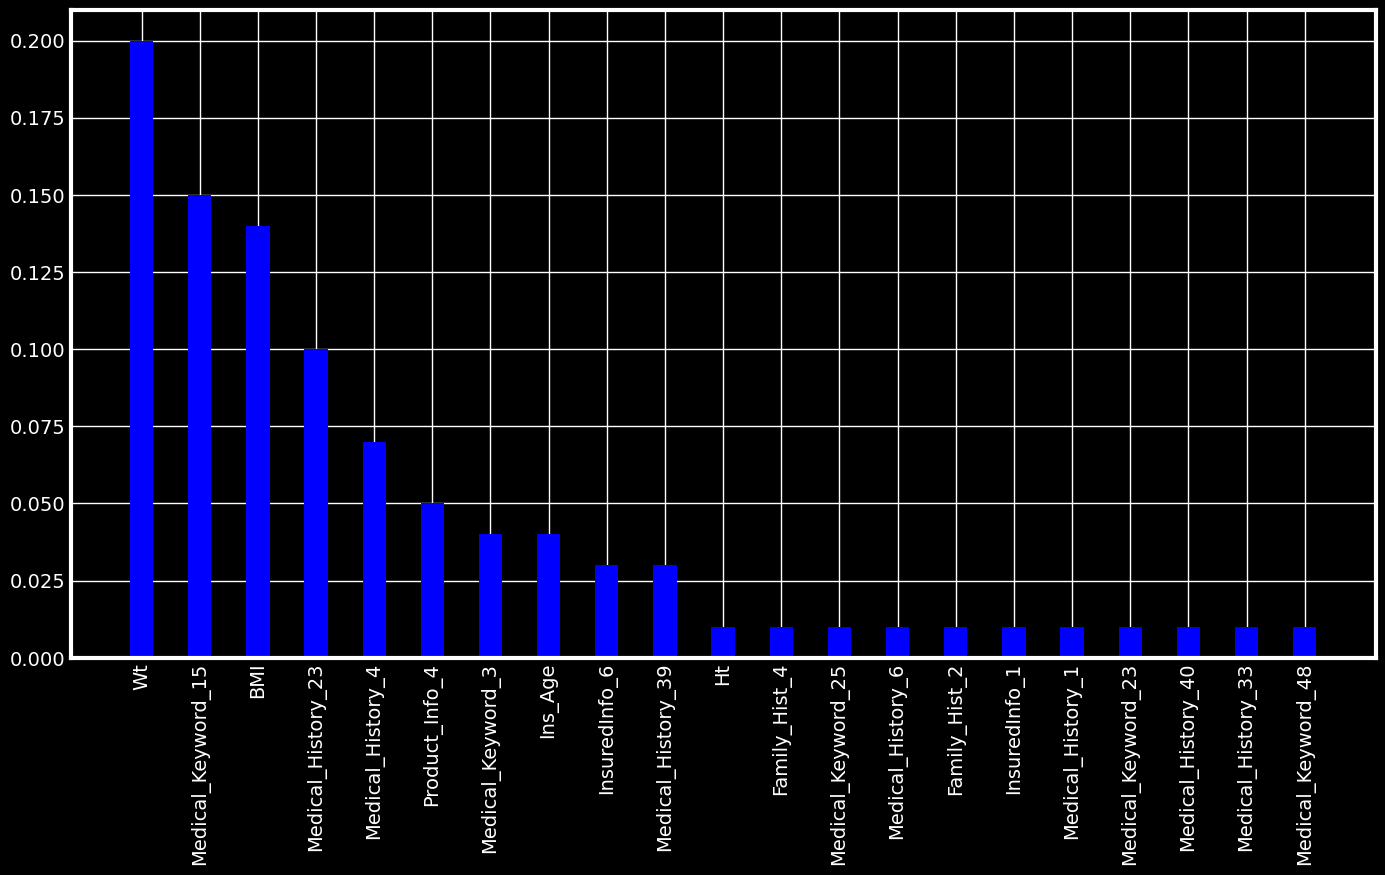

In [ ]:
# PLotting only those features which are contributing something
plot_feature_importance(rf_optimal_model, X_train)

### **CONCLUSION:**

> BMI, weight, Medical_History_23, Medical_History_4 and Medical_Keyword_15 seems to be important features according to random forest.

> Also, only these features are contributing to the model prediction. Some features can be elmininated which are not contributing on further investigation.

## **Model Interpretability For Random Forest**






### **Using Lime**

In [ ]:

# Interpreting a single data row
interpret_with_lime(rf_optimal_model,X_test)

### **Using Shap**

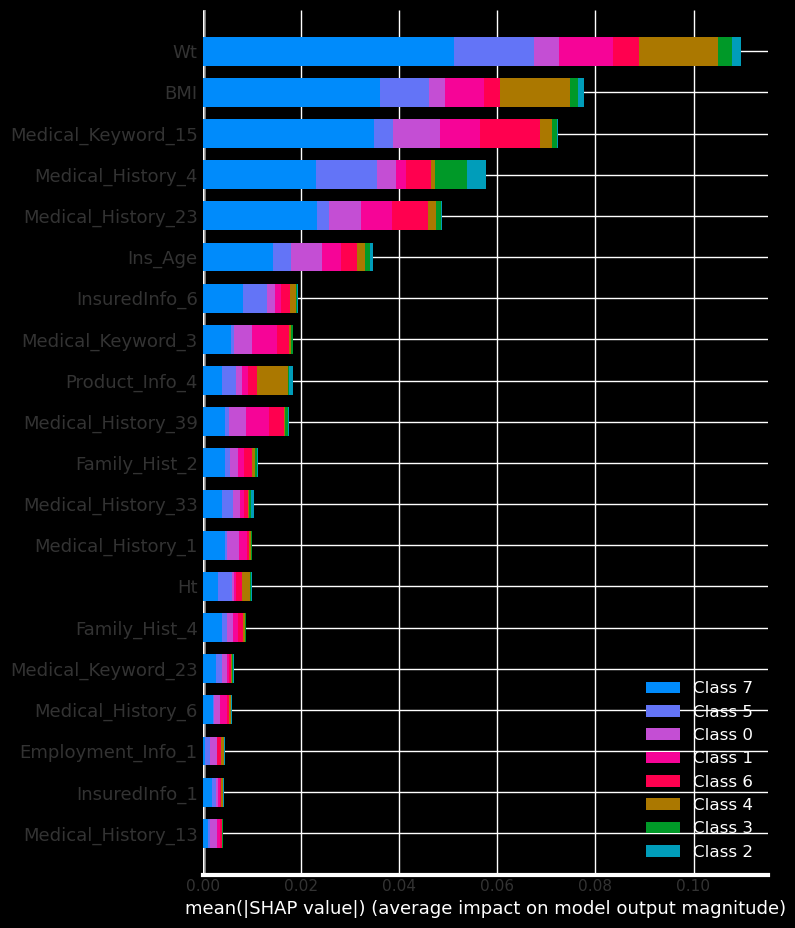

In [ ]:

# Interpretting the model using shaply
X_shap=X_train

rf_explainer = shap.TreeExplainer(rf_optimal_model)
rf_shap_values = rf_explainer.shap_values(X_shap)
shap.summary_plot(rf_shap_values, X_shap, plot_type="bar")

#### **Findings**

> medical history 23,  Wt, medical history 4 all pushing towards 7.

> Orange ones are pusing towards 1.

## **Dependence Plots**

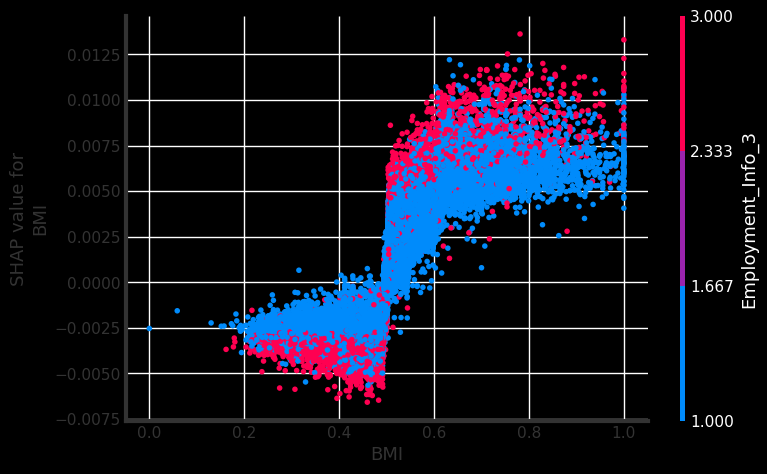

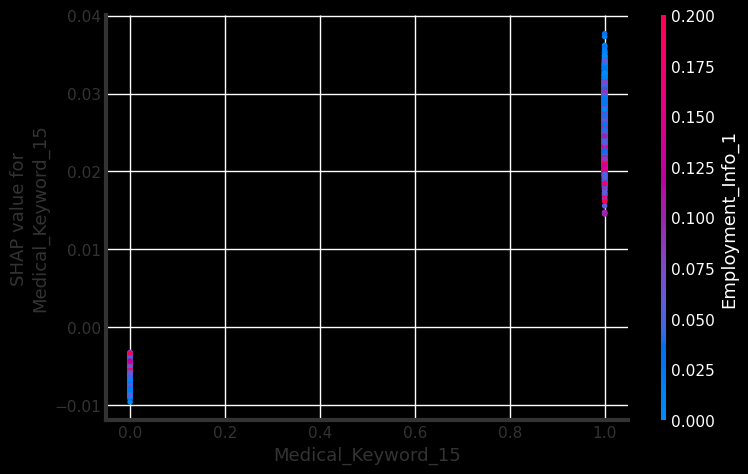

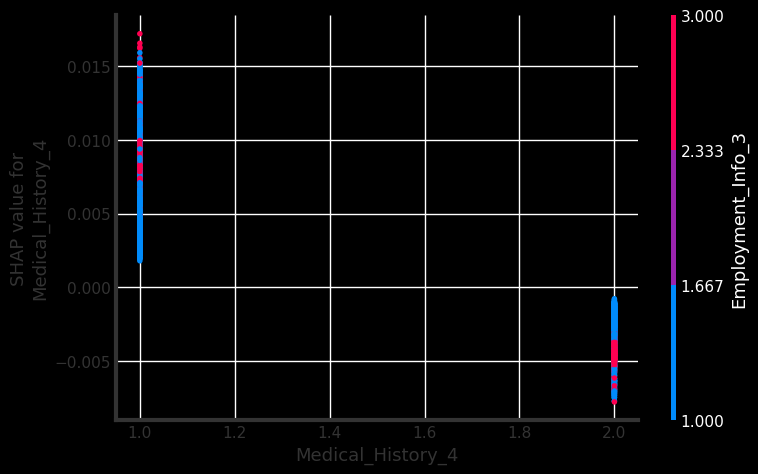

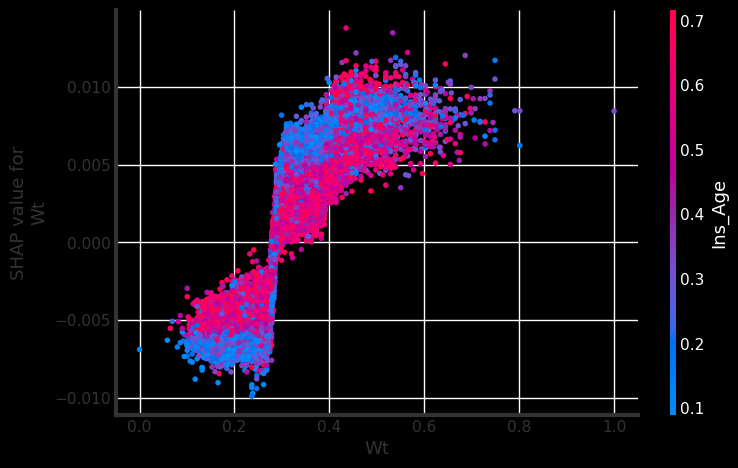

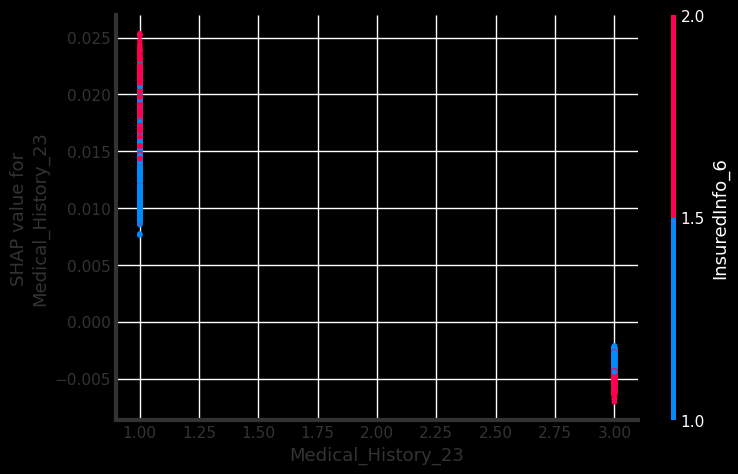

In [ ]:
# Plotting for top 5 features
top_vars = ['BMI','Medical_Keyword_15','Medical_History_4','Wt','Medical_History_23']
index_top_vars =[list(X_train.columns).index(var) for var in top_vars]

for elem in index_top_vars:
    shap.dependence_plot(elem, rf_shap_values[0], X_train)

### **Findings**

> With high medical history 23 and low bmi we get class 1

# **Gradient Boosting**




In [ ]:
#finding the best model
gb_parameters ={
    "n_estimators":[5,50],
    "max_depth":[1,3,5],
    "learning_rate":[0.01,0.1]
}

pprint(gb_parameters)

gb_optimal_model = grid_search(GradientBoostingClassifier(), gb_parameters, X_train, Y_train)

{'learning_rate': [0.01, 0.1], 'max_depth': [1, 3, 5], 'n_estimators': [5, 50]}
Fitting 2 folds for each of 12 candidates, totalling 24 fits
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   3.1s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   2.4s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=  30.5s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=50; total time=  30.7s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   4.7s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   4.5s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=  41.7s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=  42.8s
[CV] END ....learning_rate=0.01, max_depth=5, n_estimators=5; total time=   7.3s
[CV] END ....learning_rate=0.01, max_depth=5, n_estimators=5; total time=   7.2s
[CV] END ...learning_rate=0.01, max_depth=5, n_es

## **Feature Importance For Gradient Boosting**

In [ ]:
# Getting feature importance
check_importance(gb_optimal_model, X_train)

Feature  Feature Importance
9                    BMI                0.83
38     Medical_History_4                0.09
55    Medical_History_23                0.04
2         Product_Info_4                0.03
86    Medical_Keyword_15                0.01
83    Medical_Keyword_12                0.00
79     Medical_Keyword_8                0.00
80     Medical_Keyword_9                0.00
81    Medical_Keyword_10                0.00
82    Medical_Keyword_11                0.00
0         Product_Info_1                0.00
84    Medical_Keyword_13                0.00
77     Medical_Keyword_6                0.00
85    Medical_Keyword_14                0.00
87    Medical_Keyword_16                0.00
88    Medical_Keyword_17                0.00
78     Medical_Keyword_7                0.00
75     Medical_Keyword_4                0.00
76     Medical_Keyword_5                0.00
90    Medical_Keyword_19                0.00
74     Medical_Keyword_3                0.00
73     Medical_Keyword_2                0.00
72     Medical_Keyword_1                0.00
71    Medical_History_41                0.00
70    Medical_History_40                0.00
69    Medical_History_39                0.00
68    Medical_History_38                0.00
67    Medical_History_37                0.00
66    Medical_History_36                0.00
65    Medical_History_35                0.00
64    Medical_History_34                0.00
89    Medical_Keyword_18                0.00
91    Medical_Keyword_20                0.00
62    Medical_History_31                0.00
106   Medical_Keyword_35                0.00
118   Medical_Keyword_47                0.00
117   Medical_Keyword_46                0.00
116   Medical_Keyword_45                0.00
115   Medical_Keyword_44                0.00
114   Medical_Keyword_43                0.00
113   Medical_Keyword_42                0.00
112   Medical_Keyword_41                0.00
111   Medical_Keyword_40                0.00
110   Medical_Keyword_39                0.00
109   Medical_Keyword_38                0.00
108   Medical_Keyword_37                0.00
107   Medical_Keyword_36                0.00
105   Medical_Keyword_34                0.00
92    Medical_Keyword_21                0.00
104   Medical_Keyword_33                0.00
103   Medical_Keyword_32                0.00
102   Medical_Keyword_31                0.00
101   Medical_Keyword_30                0.00
100   Medical_Keyword_29                0.00
99    Medical_Keyword_28                0.00
98    Medical_Keyword_27                0.00
97    Medical_Keyword_26                0.00
96    Medical_Keyword_25                0.00
95    Medical_Keyword_24                0.00
94    Medical_Keyword_23                0.00
93    Medical_Keyword_22                0.00
63    Medical_History_33                0.00
60    Medical_History_29                0.00
61    Medical_History_30                0.00
30   Insurance_History_9                0.00
28   Insurance_History_7                0.00
27   Insurance_History_5                0.00
26   Insurance_History_4                0.00
25   Insurance_History_3                0.00
24   Insurance_History_2                0.00
23   Insurance_History_1                0.00
22         InsuredInfo_7                0.00
21         InsuredInfo_6                0.00
20         InsuredInfo_5                0.00
19         InsuredInfo_4                0.00
18         InsuredInfo_3                0.00
17         InsuredInfo_2                0.00
16         InsuredInfo_1                0.00
15     Employment_Info_6                0.00
14     Employment_Info_5                0.00
13     Employment_Info_4                0.00
12     Employment_Info_3                0.00
11     Employment_Info_2                0.00
10     Employment_Info_1                0.00
8                     Wt                0.00
7                     Ht                0.00
6                Ins_Age                0.00
5         Product_Info_7                0.00
4         Pr

In [ ]:
# Getting the scpres for all the score metrics used here
gb_model, gb_train_auc, gb_test_auc, gb_train_accuracy, gb_test_accuracy,gb_f1, gb_precision,gb_recall,gb_train_log, gb_test_log = check_scores(gb_optimal_model, X_train, X_test, Y_train, Y_test)

The balanced accuracy on train dataset is 0.125
The balanced accuracy on test dataset is 0.125

Train confusion matrix:
[[    0     0     0     0     0     0     0  4605]
 [    0     0     0     0     0     0     0  4916]
 [    0     0     0     0     0     0     0   753]
 [    0     0     0     0     0     0     0  1069]
 [    0     0     0     0     0     0     0  4071]
 [    0     0     0     0     0     0     0  8462]
 [    0     0     0     0     0     0     0  6031]
 [    0     0     0     0     0     0     0 14628]]

Test confusion matrix:
[[   0    0    0    0    0    0    0 1602]
 [   0    0    0    0    0    0    0 1636]
 [   0    0    0    0    0    0    0  260]
 [   0    0    0    0    0    0    0  359]
 [   0    0    0    0    0    0    0 1361]
 [   0    0    0    0    0    0    0 2771]
 [   0    0    0    0    0    0    0 1996]
 [   0    0    0    0    0    0    0 4861]]

ROC on train data: 0.7180582282669383
ROC on test data: 0.7162642482826969

Train log loss: 1.7876254

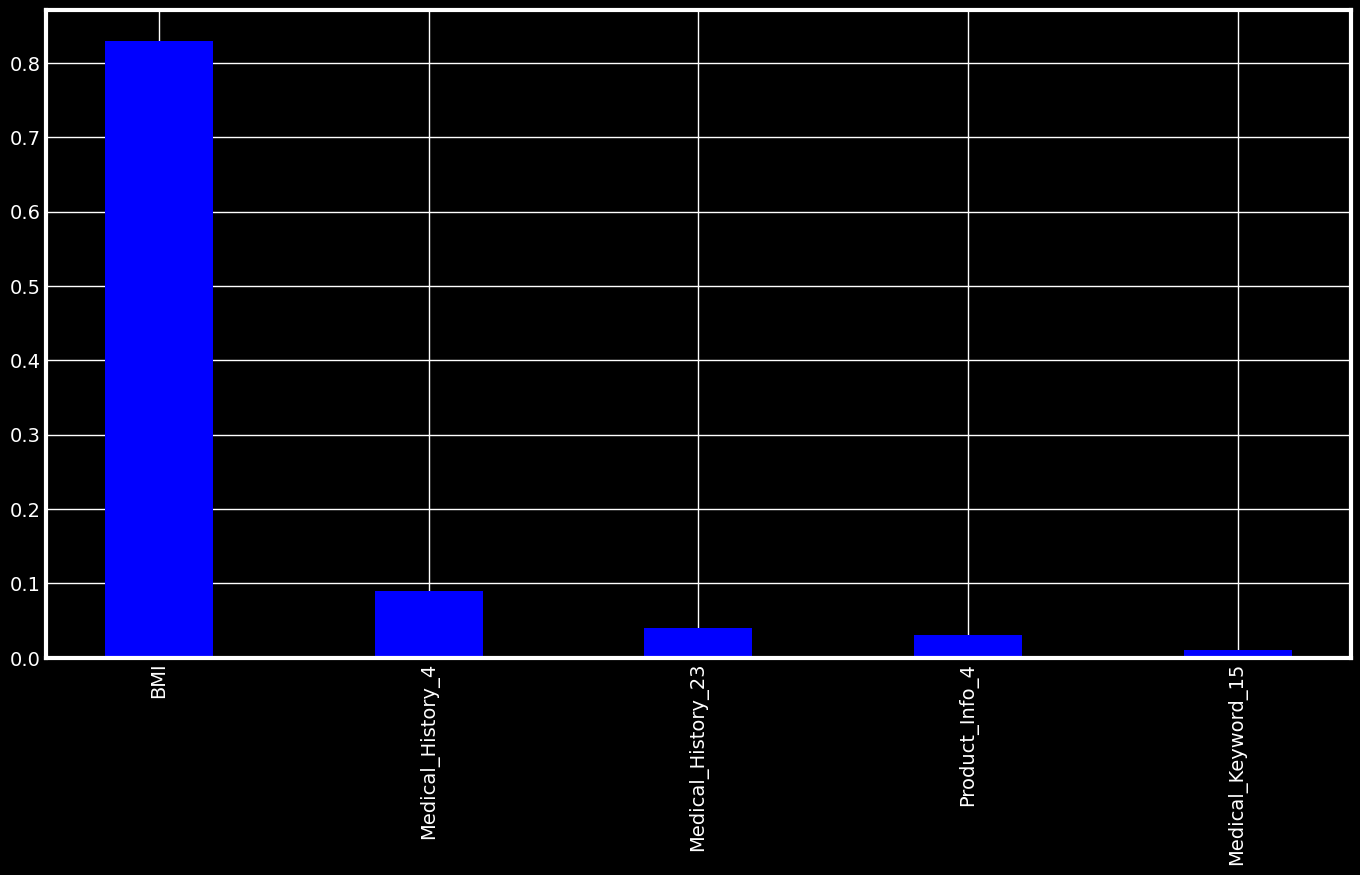

In [ ]:
# PLotting only those features which are contributing something
plot_feature_importance(gb_model, X_train)

#### **CONCLUSION:**

> BMI, weight, Medical_History_23, Medical_History_4 and Medical_Keyword_15, Product info 4 seems to be the most important 5 features according to Gradient boosting.


## **Model Interpretability For Gradient Boosting**

### **Using Lime**

In [ ]:
# Interpretting the model using lime
interpret_with_lime(gb_model,X_test)

In [ ]:

# Interpretting the model using shaply
X_shap=X_train

rf_explainer = shap.TreeExplainer(gb_model)
rf_shap_values = rf_explainer.shap_values(X_shap)
shap.summary_plot(rf_shap_values, X_shap, plot_type="bar")

AssertionError: GradientBoostingClassifier is only supported for binary classification right now!

### **Using Shap**

FALE NAM FEATURE IMPORTANCES  I DEPENDANCES ZA GRAD BOOSTING ZATO STO JE MULTICLASS

#### **Findings**
> BMI is pushing models prediction towards 0.

>Medical keyword 15 is pushing towards 1. However, medical keyword 4 is pushing towards 0.

> Also, according to feature plot Wt. was in top 5 most important features, same isn't followed here.

## **Dependence Plots**

In [ ]:
#PLotting for top 5 features
top_vars = ['BMI','Medical_Keyword_15','Medical_History_4','Product_Info_4','Medical_History_23']
index_top_vars =[list(X_train.columns).index(var) for var in top_vars]

for elem in index_top_vars:
    shap.dependence_plot(elem, gb_shap_values, X_train)

NameError: name 'gb_shap_values' is not defined

### **Findings**

> For low BMI and high medical history 23 we get class as 1.



# **XGBOOST**



In [ ]:
import numpy as np

# Check the unique values in y
unique_y = np.unique(Y_train)
print(unique_y)

# Map the unique values to the expected classes
expected_classes = [0, 1, 2, 3, 4, 5, 6, 7]
class_map = dict(zip(expected_classes, expected_classes))
if len(unique_y) != len(expected_classes) or not all(np.in1d(expected_classes, unique_y)):
    class_map = dict(zip(unique_y, expected_classes))

# Map y_train to the expected classes
Y_train_mapped = np.array([class_map[yi] for yi in Y_train])

[1 2 3 4 5 6 7 8]


In [ ]:
# Parameter grid for xgboost
xgb_parameters = {'max_depth': [1,3,5], 'n_estimators': [2,5,10], 'learning_rate': [.01 , .1, .5]}
print('XGB parameters areL:')
pprint(xgb_parameters)
#finding the best model
xgb_optimal_model = grid_search(XGBClassifier(), xgb_parameters, X_train, Y_train_mapped)




XGB parameters areL:
{'learning_rate': [0.01, 0.1, 0.5],
 'max_depth': [1, 3, 5],
 'n_estimators': [2, 5, 10]}
Fitting 2 folds for each of 27 candidates, totalling 54 fits
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=2; total time=   0.9s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=2; total time=   1.2s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   1.1s
[CV] END ....learning_rate=0.01, max_depth=1, n_estimators=5; total time=   1.3s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=10; total time=   2.7s
[CV] END ...learning_rate=0.01, max_depth=1, n_estimators=10; total time=   2.4s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=2; total time=   1.1s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=2; total time=   1.9s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   2.9s
[CV] END ....learning_rate=0.01, max_depth=3, n_estimators=5; total time=   3.6s
[CV] END ...learni

## **Feature Importance For XGBoost**

In [ ]:
# Getting the scores for all the score metrics used here
xgb_model, xgb_train_auc, xgb_test_auc, xgb_train_accuracy, xgb_test_accuracy,xgb_f1, xgb_precision,xgb_recall,xgb_train_log, xgb_test_log= check_scores(xgb_optimal_model, X_train, X_test, Y_train,Y_test)

The balanced accuracy on train dataset is 0.11021863378298993
The balanced accuracy on test dataset is 0.11251155093247484

Train confusion matrix:
[[    0     0     0     0     0     0     0     0     0]
 [  258   372     0     0   685   515   301  2474     0]
 [  273   786     0     0   827   528   318  2184     0]
 [    2    31     0     0   198   170    12   340     0]
 [    1     0     0     0     1   172    14   881     0]
 [  167   357     0     0  1686   328   371  1162     0]
 [  422    79     0     0  1126  1436  1044  4355     0]
 [  482     2     0     0   197   578  1177  3595     0]
 [   39     3     0     0    29   199   699 13659     0]]

Test confusion matrix:
[[   0    0    0    0    0    0    0    0    0]
 [  93  140    0    0  258  168  105  838    0]
 [  94  251    0    0  286  189   93  723    0]
 [   1    7    0    0   66   64    3  119    0]
 [   1    0    0    0    2   61    6  289    0]
 [  56  129    0    0  564  104  115  393    0]
 [ 155   36    0    0  386

In [ ]:
# Getting feature importance

check_importance(xgb_optimal_model, X_train)

Feature  Feature Importance
9                    BMI                0.76
55    Medical_History_23                0.13
38     Medical_History_4                0.11
0         Product_Info_1                0.00
77     Medical_Keyword_6                0.00
88    Medical_Keyword_17                0.00
87    Medical_Keyword_16                0.00
86    Medical_Keyword_15                0.00
85    Medical_Keyword_14                0.00
84    Medical_Keyword_13                0.00
83    Medical_Keyword_12                0.00
82    Medical_Keyword_11                0.00
81    Medical_Keyword_10                0.00
80     Medical_Keyword_9                0.00
79     Medical_Keyword_8                0.00
78     Medical_Keyword_7                0.00
75     Medical_Keyword_4                0.00
76     Medical_Keyword_5                0.00
90    Medical_Keyword_19                0.00
74     Medical_Keyword_3                0.00
73     Medical_Keyword_2                0.00
72     Medical_Keyword_1                0.00
71    Medical_History_41                0.00
70    Medical_History_40                0.00
69    Medical_History_39                0.00
68    Medical_History_38                0.00
67    Medical_History_37                0.00
66    Medical_History_36                0.00
65    Medical_History_35                0.00
64    Medical_History_34                0.00
89    Medical_Keyword_18                0.00
91    Medical_Keyword_20                0.00
62    Medical_History_31                0.00
106   Medical_Keyword_35                0.00
118   Medical_Keyword_47                0.00
117   Medical_Keyword_46                0.00
116   Medical_Keyword_45                0.00
115   Medical_Keyword_44                0.00
114   Medical_Keyword_43                0.00
113   Medical_Keyword_42                0.00
112   Medical_Keyword_41                0.00
111   Medical_Keyword_40                0.00
110   Medical_Keyword_39                0.00
109   Medical_Keyword_38                0.00
108   Medical_Keyword_37                0.00
107   Medical_Keyword_36                0.00
105   Medical_Keyword_34                0.00
92    Medical_Keyword_21                0.00
104   Medical_Keyword_33                0.00
103   Medical_Keyword_32                0.00
102   Medical_Keyword_31                0.00
101   Medical_Keyword_30                0.00
100   Medical_Keyword_29                0.00
99    Medical_Keyword_28                0.00
98    Medical_Keyword_27                0.00
97    Medical_Keyword_26                0.00
96    Medical_Keyword_25                0.00
95    Medical_Keyword_24                0.00
94    Medical_Keyword_23                0.00
93    Medical_Keyword_22                0.00
63    Medical_History_33                0.00
60    Medical_History_29                0.00
61    Medical_History_30                0.00
16         InsuredInfo_1                0.00
28   Insurance_History_7                0.00
27   Insurance_History_5                0.00
26   Insurance_History_4                0.00
25   Insurance_History_3                0.00
24   Insurance_History_2                0.00
23   Insurance_History_1                0.00
22         InsuredInfo_7                0.00
21         InsuredInfo_6                0.00
20         InsuredInfo_5                0.00
19         InsuredInfo_4                0.00
18         InsuredInfo_3                0.00
17         InsuredInfo_2                0.00
15     Employment_Info_6                0.00
1         Product_Info_3                0.00
14     Employment_Info_5                0.00
13     Employment_Info_4                0.00
12     Employment_Info_3                0.00
11     Employment_Info_2                0.00
10     Employment_Info_1                0.00
8                     Wt                0.00
7                     Ht                0.00
6                Ins_Age                0.00
5         Product_Info_7                0.00
4         Product_Info_6                0.00
3         Pr

### **Conclusion:**

> Same trend is seen here.

> They all are giving similar scores also so it could be that same features are contributing the most thus similar scores.


## **Model Interpretability for XGBoost**

## **Using Shap**

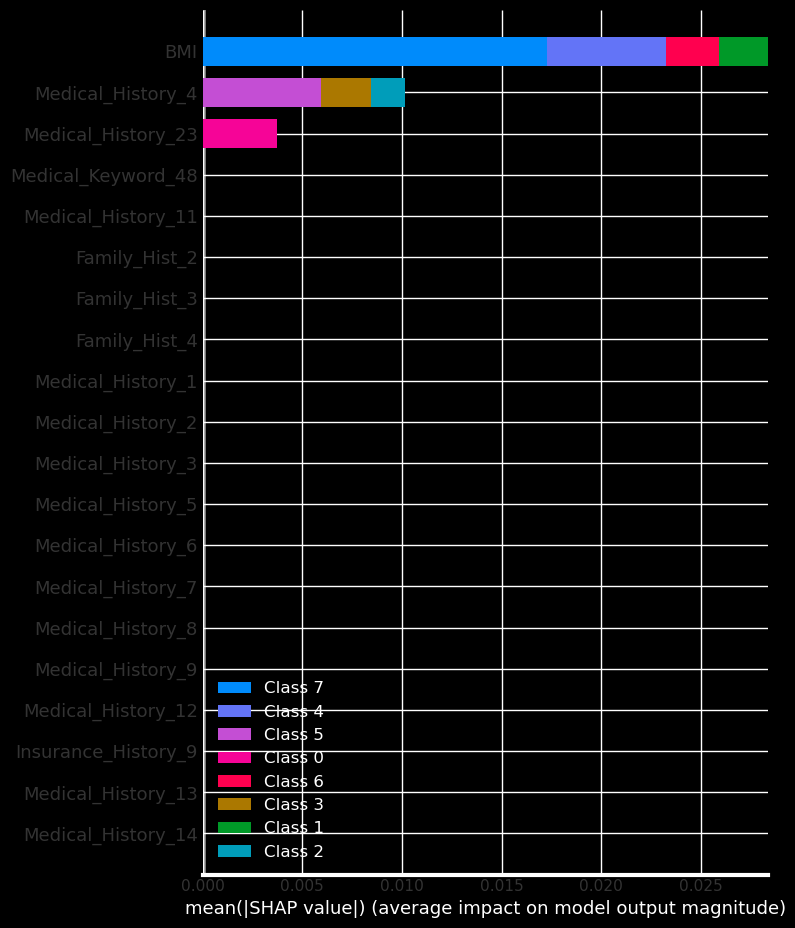

In [ ]:

# Interpretting the model using shaply

xgb_explainer = shap.TreeExplainer(xgb_optimal_model)
xgb_shap_values = xgb_explainer.shap_values(X_shap)
shap.summary_plot(xgb_shap_values, X_shap, plot_type="bar")

> Again BMI is pushing towards class 0.

> MEdical history 4 pushing towards class 1.

## **Dependence Plots**

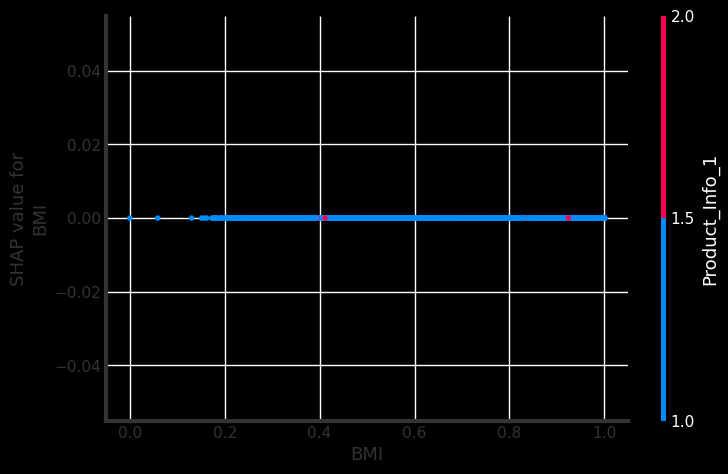

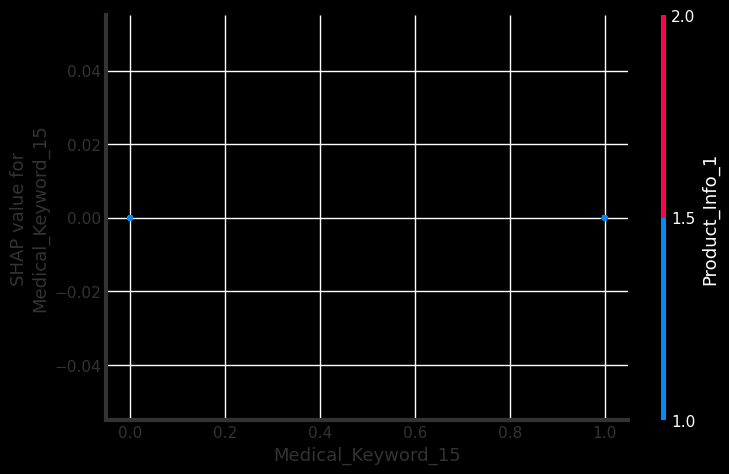

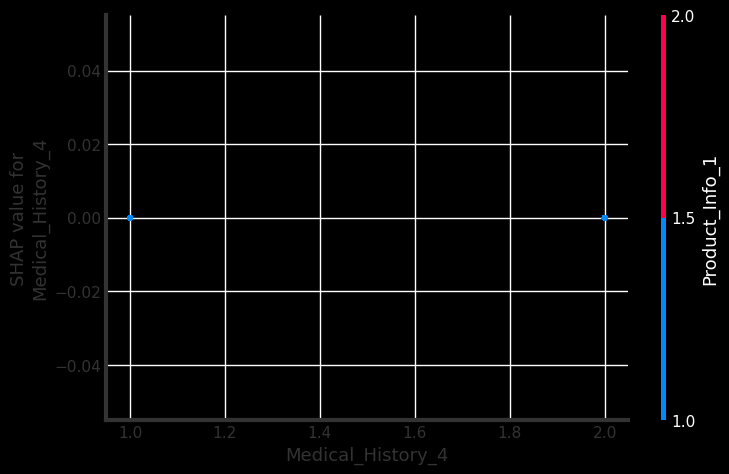

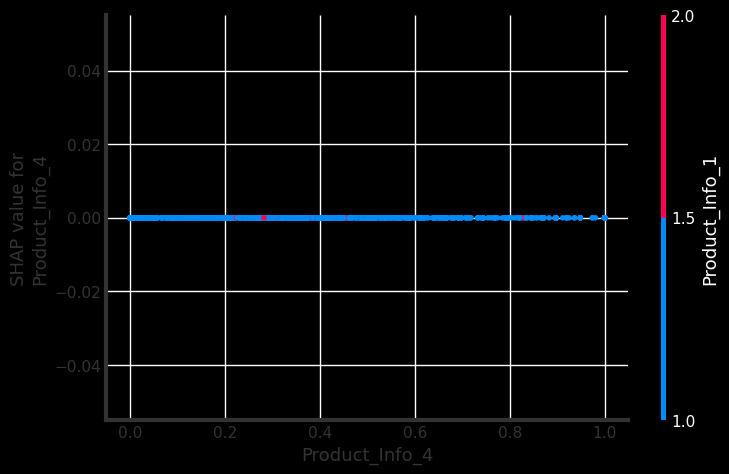

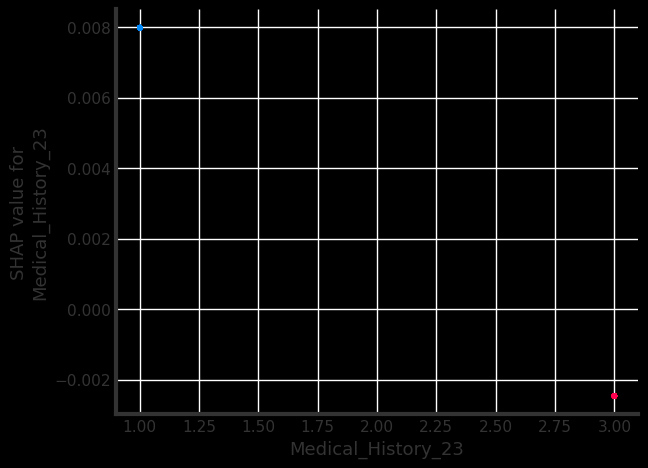

In [ ]:
#PLotting for top 5 features
top_vars = ['BMI','Medical_Keyword_15','Medical_History_4','Product_Info_4','Medical_History_23']
index_top_vars =[list(X_train.columns).index(var) for var in top_vars]

for elem in index_top_vars:
    shap.dependence_plot(elem, xgb_shap_values[0], X_train)

> For product info 4 and wt we see some interesting trend

# **Logistic Regression**

In [ ]:

# Parameter grid for Logistic Regression
solvers = ['lbfgs']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
lr_parameters = dict(solver=solvers,penalty=penalty,C=c_values)# define grid search

#finding the best model
lr_optimal_model = grid_search(LogisticRegression( max_iter=5000), lr_parameters, X_train, Y_train)



Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time= 4.9min
[CV] END ....................C=100, penalty=l2, solver=lbfgs; total time= 3.4min
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time= 3.8min
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time= 3.9min
[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time= 3.4min
[CV] END ....................C=1.0, penalty=l2, solver=lbfgs; total time= 3.4min
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time= 3.9min
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time= 3.3min
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time= 3.3min
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time= 2.2min


Best parameters are: 
{'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}


## **Feature Importance For Logistic Regression**

In [ ]:
# Getting the scores for all the score metrics used here
lr_model, lr_train_auc, lr_test_auc, lr_train_accuracy, lr_test_accuracy,lr_f1, lr_precision, lr_recall,lr_train_log, lr_test_log = check_scores(lr_optimal_model, X_train, X_test, Y_train, Y_test )

The balanced accuracy on train dataset is 0.3013774389000133
The balanced accuracy on test dataset is 0.28565168954811626

Train confusion matrix:
[[ 1318   670    10    12   271   950   338  1036]
 [  718  1143     3    12   652  1065   323  1000]
 [   63    58    13    22    69   412    13   103]
 [   32    14     3    55     0   473    24   468]
 [  263   470     3    15  1043  1102   294   881]
 [  588   517     1    35   408  3615   771  2527]
 [  243   151     2    17   119  1252  1515  2732]
 [  134    75     1    40    30  1105   239 13004]]

Test confusion matrix:
[[ 433  250    1    4  119  332  122  341]
 [ 252  339    1    5  214  365  116  344]
 [  23   16    1    6   19  142    5   48]
 [  10    3    2   11    1  156    9  167]
 [  93  158    0    2  336  360  126  286]
 [ 186  186    2   18  159 1119  255  846]
 [  84   48    0    3   40  399  486  936]
 [  58   25    1   10   17  376  101 4273]]

ROC on train data: 0.8059187966365582
ROC on test data: 0.797931692594025


In [ ]:
# Making a dataframe with coefficients and the feature names respectively
importance_df_lr = pd.concat([ pd.DataFrame(data =((X_train.columns).values).reshape(-1,1), columns = ['Feature']), pd.DataFrame(data =np.round(lr_optimal_model.coef_,2).reshape(-1,1), columns = ['Feature Importance'])], axis=1 )
importance_df_lr.sort_values(by=['Feature Importance'],ascending=False, inplace = True)
importance_df_lr

Feature  Feature Importance
489     NaN                4.15
129     NaN                3.00
488     NaN                2.36
128     NaN                1.79
159     NaN                1.60
..      ...                 ...
914     NaN               -1.83
278     NaN               -2.27
398     NaN               -2.65
848     NaN               -3.74
849     NaN               -6.93

[960 rows x 2 columns]

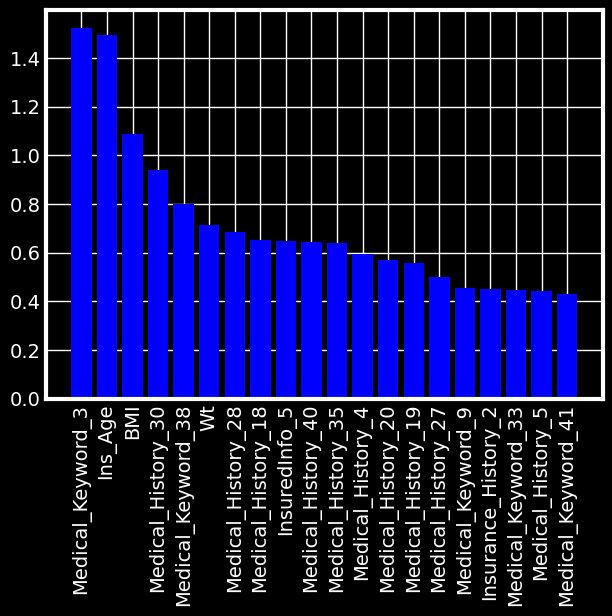

In [ ]:
importance_df_lr = pd.DataFrame(list(zip(X.columns, abs(lr_optimal_model.coef_[0]))),
                                 columns=['Feature', 'Feature Importance'])
importance_df_lr.sort_values(by=['Feature Importance'], ascending=False, inplace=True)

values = importance_df_lr[importance_df_lr['Feature Importance'] > 0]['Feature Importance'].values[:20]
features = importance_df_lr[importance_df_lr['Feature Importance'] > 0]['Feature'].values[:20]

plt.bar(features, values, color='blue')
plt.xticks(rotation='vertical')
plt.show()


#### **Conclusion**

> **And again the same pattern when doing feature importance**

## **Model Interpretability for logistic regression**

## **Using Lime**

In [ ]:

# Interpretting the model using lime
interpret_with_lime(lr_optimal_model,X_test)

### **Findings**

> Only BMI and medical history 4 pushing towards class 0

# **Max Voting Model**

In [ ]:
# Appending all the models to estimators list
estimators = []

estimators.append(('logistic', lr_optimal_model))
estimators.append(('XGB', xgb_optimal_model))
estimators.append(('GB', gb_optimal_model))
estimators.append(('rf', rf_optimal_model))

# create the voting model
voting_model = VotingClassifier(estimators, voting='soft')

voting_model.fit(X_train, Y_train)


VotingClassifier(estimators=[('logistic',
                              LogisticRegression(C=100, max_iter=5000)),
                             ('XGB',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            gpu_id=None, grow_policy=None,
                                            importan...
                                            min_child_weight=None, missing=nan,
                    

In [ ]:
# Getting all the scores and errors
voting_model, voting_train_auc, voting_test_auc, voting_train_accuracy, voting_test_accuracy, voting_f1, voting_precision, voting_recall, voting_train_log, voting_test_log = check_scores(voting_model, X_train, X_test, Y_train, Y_test )

The balanced accuracy on train dataset is 0.24607588945081843
The balanced accuracy on test dataset is 0.23815104193820427

Train confusion matrix:
[[  904   482     0     0   143  1078   249  1749]
 [  411   821     0     0   416  1276   232  1760]
 [   25    29     0     0    25   405     5   264]
 [   13     1     0     0     0   286     7   762]
 [  141   288     0     0   415  1264   187  1776]
 [  260   228     0     0    44  3080   494  4356]
 [   80    46     0     0     6  1140  1097  3662]
 [   23     8     0     0     3   496    92 14006]]

Test confusion matrix:
[[ 285  184    0    0   70  381   84  598]
 [ 154  248    0    0  131  424   76  603]
 [  10    9    0    0    4  136    3   98]
 [   6    0    0    0    0  104    4  245]
 [  53  108    0    0  122  427   83  568]
 [  96  114    0    0   21  952  160 1428]
 [  26   14    0    0    3  350  367 1236]
 [   9    2    0    0    2  156   32 4660]]

ROC on train data: 0.8158025955562822
ROC on test data: 0.808558213641832

# **Stacked Model**

In [ ]:
# Subtract 1 from Y_train to make the classes start from 0
Y_train = Y_train - 1
#Building a stacked classifier
stacked_classifier = StackingClassifier(classifiers =[lr_optimal_model, xgb_optimal_model, gb_optimal_model], meta_classifier = RandomForestClassifier(), use_probas = True, use_features_in_secondary = True)

# training of stacked model
stacked_model = stacked_classifier.fit(X_train, Y_train)   


In [ ]:
stacked_model, stacked_train_auc, stacked_test_auc, stacked_train_accuracy, stacked_test_accuracy, stacked_f1, stacked_precision, stacked_recall, stacked_train_log, stacked_test_log = check_scores(stacked_model, X_train, X_test, Y_train, Y_test )

The balanced accuracy on train dataset is 0.9999390746541821
The balanced accuracy on test dataset is 0.11184196485331235

Train confusion matrix:
[[ 4605     0     0     0     0     0     0     0]
 [    0  4915     0     0     0     0     0     1]
 [    0     0   753     0     0     0     0     0]
 [    0     0     0  1069     0     0     0     0]
 [    0     0     0     0  4071     0     0     0]
 [    0     0     0     0     1  8461     0     0]
 [    0     0     0     0     0     0  6030     1]
 [    0     0     0     0     0     0     0 14628]]

Test confusion matrix:
[[   0    0    0    0    0    0    0    0    0]
 [ 408  268    8    5  109  335  148  321    0]
 [ 230  430    7   11  172  362  131  293    0]
 [  17   19   14   17   67   94    9   23    0]
 [   9    3    0   33    2  159   22  131    0]
 [  64  153   10    1  706  266   55  106    0]
 [ 152  162    1   29  130 1383  330  584    0]
 [  62   33    1    9   12  433  772  674    0]
 [  34   33    1   28   12  366  205

# **Models And Their Accuracies**

In [ ]:
# Making a dataframe of all the scores for every model
scores_ =[("Random Forest", rf_train_auc, rf_test_auc, rf_train_accuracy, rf_test_accuracy,rf_train_log, rf_test_log,rf_f1, rf_precision, rf_recall),
("Gradient Boosting",  gb_train_auc, gb_test_auc, gb_train_accuracy, gb_test_accuracy,gb_train_log, gb_test_log,gb_f1, gb_precision,gb_recall,),
("XG Boost", xgb_train_auc, xgb_test_auc, xgb_train_accuracy, xgb_test_accuracy,xgb_train_log, xgb_test_log,xgb_f1, xgb_precision, xgb_recall),
("Logistic Regression", lr_train_auc, lr_test_auc, lr_train_accuracy, lr_test_accuracy,lr_train_log, lr_test_log,lr_f1, lr_precision, lr_recall,),
("Voting Classifier", voting_train_auc, voting_test_auc, voting_train_accuracy, voting_test_accuracy, voting_train_log, voting_test_log, voting_f1, voting_precision, voting_recall),
("Stacked Model", stacked_train_auc, stacked_test_auc, stacked_train_accuracy, stacked_test_accuracy, stacked_train_log, stacked_test_log, stacked_f1, stacked_precision, stacked_recall)]

Scores_ =pd.DataFrame(data = scores_, columns=['Model Name', 'Train ROC', 'Test ROC', 'Train Accuracy', 'Test Accuracy', 'Train Log Loss','Test Log Loss','F-Score', 'Precision','Recall',])
Scores_.set_index('Model Name', inplace = True)

Scores_


Train ROC  Test ROC  Train Accuracy  Test Accuracy  \
Model Name                                                                
Random Forest         0.790934  0.784622        0.209563       0.207309   
Gradient Boosting     0.718058  0.716264        0.125000       0.125000   
XG Boost              0.667028  0.666192        0.110219       0.112512   
Logistic Regression   0.805919  0.797932        0.301377       0.285652   
Voting Classifier     0.815803  0.808558        0.246076       0.238151   
Stacked Model         1.000000  0.827702        0.999939       0.111842   

                     Train Log Loss  Test Log Loss   F-Score  Precision  \
Model Name                                                                
Random Forest              1.573722       1.581638  0.187770   0.315059   
Gradient Boosting          1.787625       1.792676  0.061666   0.040929   
XG Boost                   2.067412       2.067561  0.065475   0.079807   
Logistic Regression        1.400578       1.426397  0.288444   0.340811   
Voting Classifier          1.600826       1.611780  0.232312   0.303659   
Stacked Model              0.260931       1.489924  0.079806   0.102439   

                       Recall  
Model Name                     
Random Forest        0.207309  
Gradient Boosting    0.125000  
XG Boost             0.100010  
Logistic Regression  0.285652  
Voting Classifier    0.238151  
Stacked Model        0.099415

# **Final Results**

> **Gradient Boosting, Voting Classifier and Stacked models are performing really well. Their train and test errors and also the roc scores and f scores are really close and good.**